In [1]:
import numpy as np
import pandas as pd
from scipy.stats import poisson
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./data/data.csv')

In [3]:
# dataを要約
print(len(data))
print(data.describe())

50
              X
count  50.00000
mean    3.56000
std     1.72804
min     0.00000
25%     2.00000
50%     3.00000
75%     4.75000
max     7.00000


In [4]:
# 頻度分布を出力
print(data.X.value_counts().sort_index())

0     1
1     3
2    11
3    12
4    10
5     5
6     4
7     4
Name: X, dtype: int64


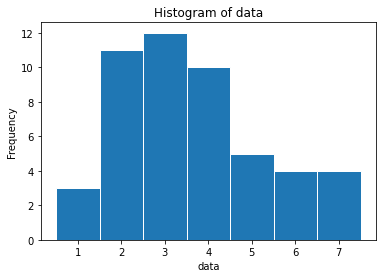

In [5]:
# 図2.2のヒストグラムを出力
plt.hist(data.X, bins=(np.arange(8) + 0.5), edgecolor='w')
plt.title("Histogram of data")
plt.xlabel("data")
plt.ylabel("Frequency")
plt.show()

In [6]:
# 標本分散を求める
print(data.var())
# 標本標準偏差を求める
print(data.std())
print(np.sqrt(data.var()))

X    2.986122
dtype: float64
X    1.72804
dtype: float64
X    1.72804
dtype: float64


## 2.2 データと確率分布の対応関係を眺める

In [7]:
# 図2.3 を出力
prob = poisson.pmf(np.arange(10), data.X.mean())
print(pd.DataFrame({'y': np.arange(10),
                    'prob': prob}))

   y      prob
0  0  0.028439
1  1  0.101242
2  2  0.180211
3  3  0.213851
4  4  0.190327
5  5  0.135513
6  6  0.080404
7  7  0.040891
8  8  0.018197
9  9  0.007198


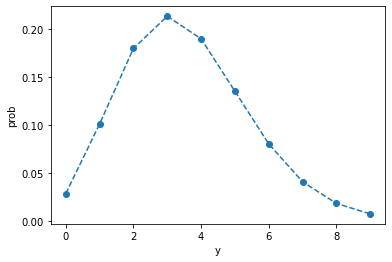

In [8]:
# 図2.4を描画
plt.plot(np.arange(10), prob, ls='--', marker='o')
plt.xlabel('y')
plt.ylabel('prob')
plt.show()

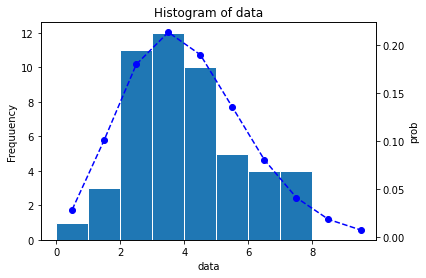

In [9]:
# 図2.5を描画
fig, ax1 = plt.subplots()
ax1.hist(data.X, bins=(np.arange(9)), edgecolor='w', zorder=1)
ax1.set_title("Histogram of data")
ax1.set_xlabel("data")
ax1.set_ylabel("Frequuency")
ax2 = ax1.twinx()
ax2.plot((np.arange(10) + 0.5), prob, ls='--', marker='o', color='b', zorder=2)
ax2.set_ylabel("prob")
plt.show()

## 2.3 ポアソン分布とは何か

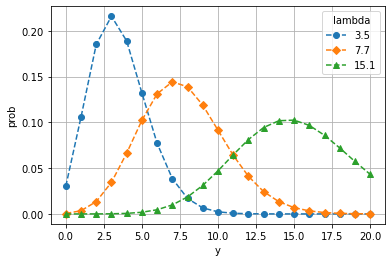

In [10]:
# 図2.6を描画
x = np.arange(21)
prob1 = poisson.pmf(x, 3.5)
prob2 = poisson.pmf(x, 7.7)
prob3 = poisson.pmf(x, 15.1)
plt.plot(x, prob1, ls='--', marker='o', label='3.5')
plt.plot(x, prob2, ls='--', marker='D', label='7.7')
plt.plot(x, prob3, ls='--', marker='^', label='15.1')
plt.xlabel("y")
plt.ylabel("prob")
plt.grid()
plt.legend(title='lambda')
plt.show()

## 2.4 ポアソン分布のパラメータの最尤推定

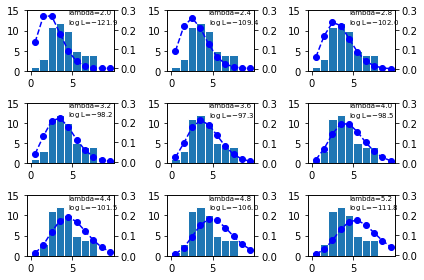

In [11]:
# 図2.7を描画
fig, axes1 = plt.subplots(3, 3)
# 左上
axes1[0][0].hist(data.X, bins=(np.arange(9)), edgecolor='w', zorder=1)
axes1[0][0].set_yticks([0, 5, 10, 15])
axes2 = axes1[0][0].twinx()
axes2.plot((np.arange(10) + 0.5), poisson.pmf(np.arange(10), 2.0), ls='--', marker='o', color='b', label='2.0')
axes2.set_yticks([0.0, 0.1, 0.2, 0.3])
axes2.text(4.5, 0.23, "lambda=2.0\nlog L=$-$121.9", fontsize=7)
# 中央上
axes1[0][1].hist(data.X, bins=(np.arange(9)), edgecolor='w', zorder=1)
axes1[0][1].set_yticks([0, 5, 10, 15])
axes2 = axes1[0][1].twinx()
axes2.plot((np.arange(10) + 0.5), poisson.pmf(np.arange(10), 2.4), ls='--', marker='o', color='b', label='2.4')
axes2.set_yticks([0.0, 0.1, 0.2, 0.3])
axes2.text(4.5, 0.23, "lambda=2.4\nlog L=$-$109.4", fontsize=7)
# 右上
axes1[0][2].hist(data.X, bins=(np.arange(9)), edgecolor='w', zorder=1)
axes1[0][2].set_yticks([0, 5, 10, 15])
axes2 = axes1[0][2].twinx()
axes2.plot((np.arange(10) + 0.5), poisson.pmf(np.arange(10), 2.8), ls='--', marker='o', color='b', label='2.8')
axes2.set_yticks([0.0, 0.1, 0.2, 0.3])
axes2.text(4.5, 0.23, "lambda=2.8\nlog L=$-$102.0", fontsize=7)
# 中段左
axes1[1][0].hist(data.X, bins=(np.arange(9)), edgecolor='w', zorder=1)
axes1[1][0].set_yticks([0, 5, 10, 15])
axes2 = axes1[1][0].twinx()
axes2.plot((np.arange(10) + 0.5), poisson.pmf(np.arange(10), 3.2), ls='--', marker='o', color='b', label='3.2')
axes2.set_yticks([0.0, 0.1, 0.2, 0.3])
axes2.text(4.5, 0.23, "lambda=3.2\nlog L=$-$98.2", fontsize=7)
# 中央
axes1[1][1].hist(data.X, bins=(np.arange(9)), edgecolor='w', zorder=1)
axes1[1][1].set_yticks([0, 5, 10, 15])
axes2 = axes1[1][1].twinx()
axes2.plot((np.arange(10) + 0.5), poisson.pmf(np.arange(10), 3.6), ls='--', marker='o', color='b', label='3.6')
axes2.set_yticks([0.0, 0.1, 0.2, 0.3])
axes2.text(4.5, 0.23, "lambda=3.6\nlog L=$-$97.3", fontsize=7)
# 中段右
axes1[1][2].hist(data.X, bins=(np.arange(9)), edgecolor='w', zorder=1)
axes1[1][2].set_yticks([0, 5, 10, 15])
axes2 = axes1[1][2].twinx()
axes2.plot((np.arange(10) + 0.5), poisson.pmf(np.arange(10), 4.0), ls='--', marker='o', color='b', label='4.0')
axes2.set_yticks([0.0, 0.1, 0.2, 0.3])
axes2.text(4.5, 0.23, "lambda=4.0\nlog L=$-$98.5", fontsize=7)
# 左下
axes1[2][0].hist(data.X, bins=(np.arange(9)), edgecolor='w', zorder=1)
axes1[2][0].set_yticks([0, 5, 10, 15])
axes2 = axes1[2][0].twinx()
axes2.plot((np.arange(10) + 0.5), poisson.pmf(np.arange(10), 4.4), ls='--', marker='o', color='b', label='4.4')
axes2.set_yticks([0.0, 0.1, 0.2, 0.3])
axes2.text(4.5, 0.23, "lambda=4.4\nlog L=$-$101.5", fontsize=7)
# 中央下
axes1[2][1].hist(data.X, bins=(np.arange(9)), edgecolor='w', zorder=1)
axes1[2][1].set_yticks([0, 5, 10, 15])
axes2 = axes1[2][1].twinx()
axes2.plot((np.arange(10) + 0.5), poisson.pmf(np.arange(10), 4.8), ls='--', marker='o', color='b', label='4.8')
axes2.set_yticks([0.0, 0.1, 0.2, 0.3])
axes2.text(4.5, 0.23, "lambda=4.8\nlog L=$-$106.0", fontsize=7)
# 左下
axes1[2][2].hist(data.X, bins=(np.arange(9)), edgecolor='w', zorder=1)
axes1[2][2].set_yticks([0, 5, 10, 15])
axes2 = axes1[2][2].twinx()
axes2.plot((np.arange(10) + 0.5), poisson.pmf(np.arange(10), 5.2), ls='--', marker='o', color='b', label='5.2')
axes2.set_yticks([0.0, 0.1, 0.2, 0.3])
axes2.text(4.5, 0.23, "lambda=5.2\nlog L=$-$111.8", fontsize=7)
# 描画
plt.tight_layout()
plt.show()

In [12]:
# P.27のRコードに相当
def logL(x, m):
    return np.sum(np.log(poisson.pmf(x, m)))

In [13]:
lambdas = np.arange(2, 5, 0.1)
logs = np.array([logL(data.X, l) for l in lambdas])
hat_lambda = lambdas[np.argmax(logs)]

3.6000000000000014
-121.88118178691754
-97.25515543434037


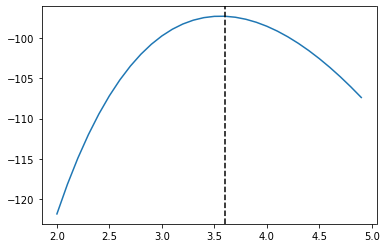

In [14]:
# 図2.8を描画
plt.plot(lambdas, logs)
plt.axvline(x=hat_lambda, ymin=0, ymax=1, color='black', ls='--')
print(hat_lambda)
print(logs.min())
print(logs.max())
plt.show()

### 2.4.1 擬似乱数と最尤推定値のばらつき

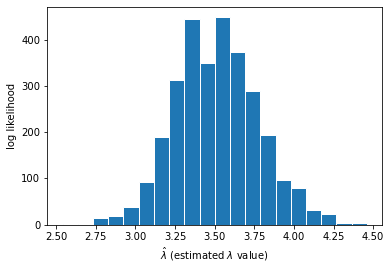

In [16]:
# 擬似乱数の生成
# 図2.9の描画
rand_values = np.random.poisson(lam=3.5, size=[50, 3000])
hat_lambdas = rand_values.mean(axis=0)
plt.hist(hat_lambdas, bins=20, edgecolor='w')
plt.xlabel("$\hat{\lambda}$ (estimated $\lambda$ value)")
plt.ylabel("log likelihood")
plt.show()